
1.Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2.Perform a similar alanlaysis as above on this dataset with the following sections:
3.High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4.Explain our objective.
5.Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6.Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7.Write your observations in english as crisply and unambigously as possible. Always quantify your results.





observation:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

there are 305 rows and 4 columns and 1st row is considerd as the column

Objective: To predict patients survival chances given patient's age,year of operation and positive axial node 


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
haberman=pd.read_csv("haberman.csv")
haberman


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [6]:
#to tell pandas not to consider 1st row as a column and create new  comlumns
haberman=pd.read_csv("haberman.csv",header=None,names=['Age','Op_year','Positive_Axial_nodes','survival_status'])
haberman

,Age,Op_year,Positive_Axial_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
haberman.columns #now there are 306 rows and 4 features inclu.class label

Index(['Age', 'Op_year', 'Positive_Axial_nodes', 'survival_status'], dtype='object')

In [8]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                     306 non-null int64
Op_year                 306 non-null int64
Positive_Axial_nodes    306 non-null int64
survival_status         306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [9]:
#survival_status is in int type it must be must ne classified as category type  becoz it is a class label
haberman.survival_status=haberman.survival_status.map({1:'Yes',2:'NO'})
haberman.survival_status=haberman.survival_status.astype('category')
haberman

,Age,Op_year,Positive_Axial_nodes,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,NO
8,34,66,9,NO
9,34,58,30,Yes


In [10]:
print(haberman.shape) #no of rows and columns

(306, 4)


In [11]:
#count patience data
print(haberman.Age.value_counts()) # total no of patience age
print(haberman.Positive_Axial_nodes.value_counts()) # total no of postive axial nodes

print(haberman['survival_status'].value_counts()) #total of of survivors who were alive and dead 

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Positive_Axial_nodes, dtype: int64
Yes    225
NO      81
Name: survival_status, dtype: int64


In [170]:
haberman.describe()

,Age,Op_year,Positive_Axial_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


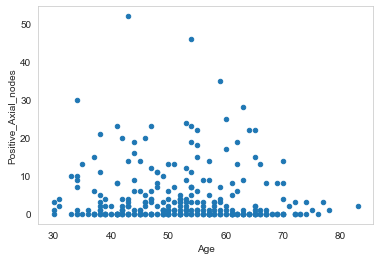

In [176]:
#2d scatter plot
haberman.plot(kind='scatter',x='Age',y='Positive_Axial_nodes')
plt.grid()
plt.show()
#observation:very hard to visualize

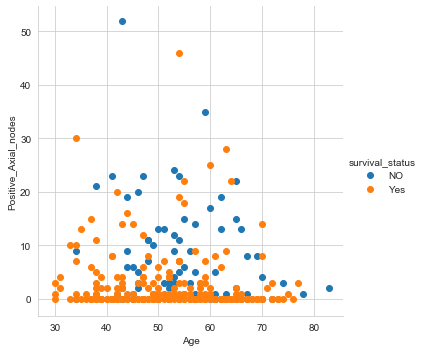

In [175]:
#2d scatter plot using seaborn
sns.FacetGrid(haberman,hue='survival_status',size=5)\
    .map(plt.scatter,'Age','Positive_Axial_nodes')\
    .add_legend()
plt.show()

c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


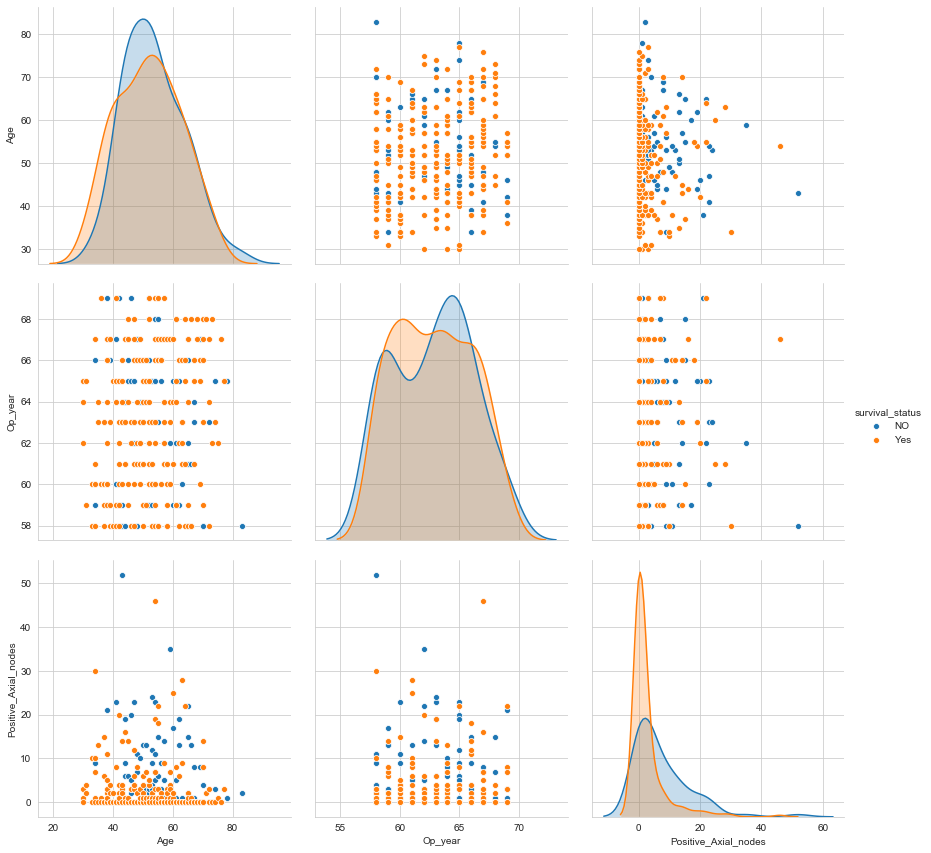

In [173]:
#pair plot using seaborn
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='survival_status',size=4)
plt.show()

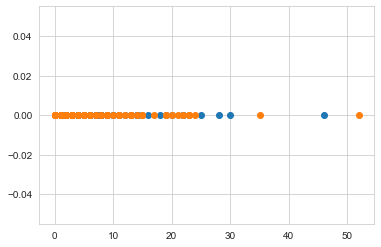

In [182]:
#1-d scatter plot
haberman_yes=haberman.loc[haberman.survival_status=='Yes']
haberman_no=haberman.loc[haberman.survival_status=='NO']
haberman_yes

plt.plot(haberman_yes.Positive_Axial_nodes,np.zeros_like(haberman_yes.Positive_Axial_nodes),'o')
plt.plot(haberman_no.Positive_Axial_nodes,np.zeros_like(haberman_no.Positive_Axial_nodes),'o')
plt.show()


c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


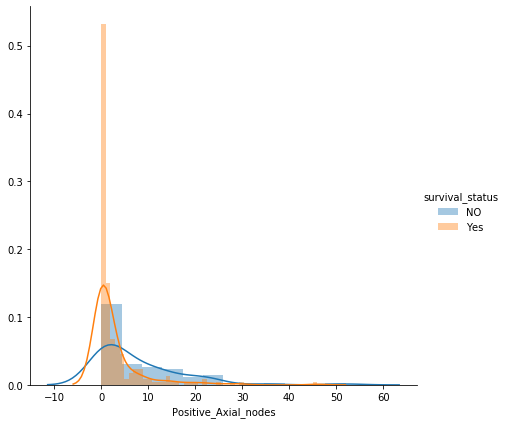

In [12]:
sns.FacetGrid(haberman,hue='survival_status',size=6)\
    .map(sns.distplot,'Positive_Axial_nodes')\
    .add_legend()
plt.show()

c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


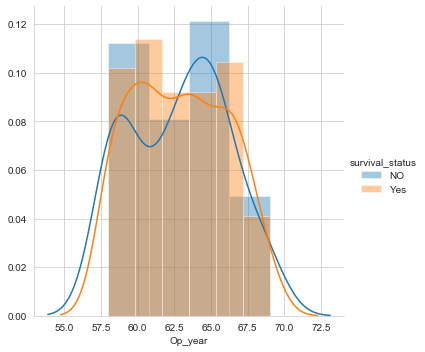

In [204]:
sns.FacetGrid(haberman,hue='survival_status',size=5)\
    .map(sns.distplot,'Op_year')\
    .add_legend()
plt.show()

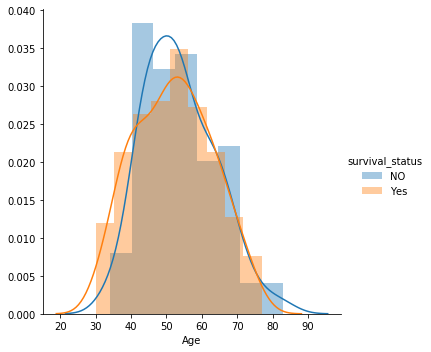

In [13]:
sns.FacetGrid(haberman,hue='survival_status',size=5)\
    .map(sns.distplot,'Age')\
    .add_legend()
plt.show()

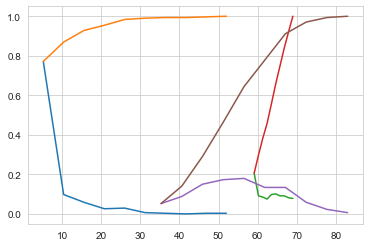

In [37]:

#pdf and cdf

hist,bin_edges=np.histogram(haberman.Positive_Axial_nodes,bins=10)
hist
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)




hist,bin_edges=np.histogram(haberman.Op_year,bins=10)
hist
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
sns.set_style('whitegrid')



hist,bin_edges=np.histogram(haberman.Age,bins=10)
hist
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)




plt.show()

In [36]:
#percentile and Quantile

print(np.percentile(haberman.Positive_Axial_nodes,np.arange(0,101,25)))
print(np.percentile(haberman.Op_year,np.arange(0,101,25)))
print(np.percentile(haberman.Age,np.arange(0,101,25)))

print(np.percentile(haberman.Positive_Axial_nodes,86)) #nodes less than 10
print(np.percentile(haberman.Op_year,75))
print(np.percentile(haberman.Age,80))



[ 0.  0.  1.  4. 52.]
[58.   60.   63.   65.75 69.  ]
[30.   44.   52.   60.75 83.  ]
9.300000000000011
65.75
62.0


In [32]:
print(np.mean(haberman.Positive_Axial_nodes)) #avg value 
print(np.median(haberman.Positive_Axial_nodes)) #middle element

4.026143790849673
1.0


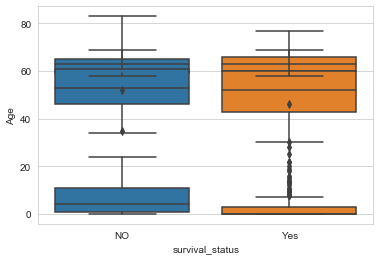

In [39]:
#BOX PLOT
sns.boxplot(x='survival_status',y='Positive_Axial_nodes',data=haberman)
plt.show()

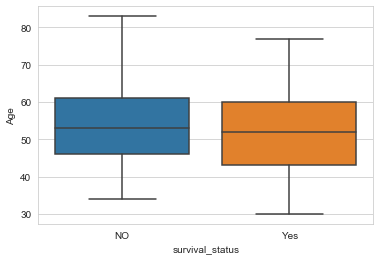

In [41]:
#BOX PLOT
sns.boxplot(x='survival_status',y='Age',data=haberman)
plt.show()

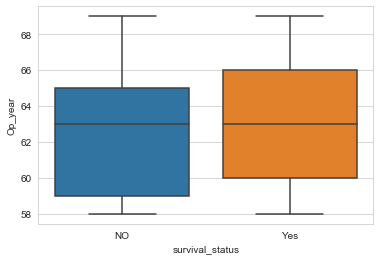

In [40]:
#BOX PLOT
sns.boxplot(x='survival_status',y='Op_year',data=haberman)
plt.show()